In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import scipy as sci
import matplotlib
import scikit_posthocs as sci_posthocs

import analysis as ana
import plot as pl

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
pd.set_option('display.max_colwidth', None)

In [58]:
import matplotlib as mpl
from matplotlib import rc

rc('text', usetex=False)
font = {'family':'CMU Serif', 
               #'sans-serif':['Helvetica'],
               'size': 11}
mpl.rc('font', **font)

# Loading Data

In [5]:
# brain_data, cog_data, subj_data = ana.load_data('../data')
brain_data_z, cog_data_z, subj_data = ana.load_data('../data_zscore')
# brain_data_q, cog_data_q, subj_data = ana.load_data('../data_quant')

In [62]:
cog_data_z.head()

,sex,interview_age,sestot,mot_edscale,acpt01_auditory_t1,acpt01_auditory_t3,acpt01_auditory_t4,acpt01_auditory_t5,acpt01_auditory_t6,acpt01_auditory_t8,acpt01_auditory_t9,acpt01_auditory_t10,acpt01_auditory_t11,acpt01_auditory_t13,acpt01_auditory_t14,acpt01_auditory_t15,cogcomp01_nih_fluidcogcomp_unadjusted,cogcomp01_nih_crycogcomp_unadjusted,dccs01_nih_dccs_ageadjusted,deldisk01_sv_6mo_40000,deldisk01_sv_3yr_40000,deldisk01_sv_1mo_40000,deldisk01_sv_5yr_40000,deldisk01_sv_10yr_40000,deldisk01_sv_1yr_40000,deldisk01_auc_200,deldisk01_auc_40000,er4001_er40_c_cr,er4001_er40_c_rtcr,er4001_er40_c_ang,er4001_er40_c_fear,er4001_er40_c_hap,er4001_er40_c_noe,er4001_er40_c_sad,er4001_er40_c_fpa,er4001_er40_c_fpf,er4001_er40_c_fph,er4001_er40_c_fpn,er4001_er40_c_fps,flanker01_nih_flanker_ageadjusted,lswmt01_tbx_ls,orrt01_read_acss,pcps01_nih_patterncomp_ageadjusted,tpvt01_tpvt_acss,wasi201_vocab_totalrawscore,wasi201_matrix_totalrawscore,wasi201_iqscores_full2iq
1010,0,0.677291,0.0,0.666667,0.719724,-0.466422,0.747283,-0.379579,0.513235,-0.294886,0.527506,0.428788,1.280175,-0.481063,1.263284,-0.459052,1.985641,0.680216,2.225363,0.787117,1.218434,0.639119,1.241682,1.247383,1.109067,-0.097624,1.355674,-0.160525,-0.455035,-0.434196,0.089844,0.372565,-0.028823,-0.130845,1.018440,-0.100460,0.498143,-0.088523,-0.796775,1.839759,1.537035,0.709581,1.185320,0.299544,0.438681,1.108016,0.993161
3001,0,0.633513,0.0,1.000000,0.462680,-0.466422,0.503197,-0.356620,0.513235,-0.294886,0.527506,-0.596201,1.280175,-0.358424,1.263284,-0.450115,0.328610,0.779121,0.190070,0.787117,1.393707,0.639119,1.591451,1.517041,1.109067,2.736771,1.614511,1.356636,-0.693871,1.207277,0.822784,0.372565,0.715771,0.502934,-0.643226,-0.723308,-0.379268,-0.545889,-0.796775,0.810291,-0.158626,0.998888,1.185320,0.299544,0.294623,1.108016,0.685650
3002,0,3.260203,0.0,1.000000,-0.308453,-0.466422,-0.290082,-0.149987,0.078528,-0.003757,0.062060,-0.069337,-0.652074,-0.358424,-0.586394,-0.083716,0.190524,1.372555,-0.471400,0.787117,-1.323033,0.639119,-1.119263,-0.909877,1.109067,-0.406130,-0.801296,0.749771,-0.589950,-0.434196,0.822784,0.372565,0.715771,0.502934,-0.643226,0.522389,-0.379268,-0.545889,-0.796775,0.749734,0.123984,0.902453,0.638630,0.989089,0.870856,0.179678,0.439642
3026,1,2.866199,0.0,0.666667,0.462680,-0.466422,0.442176,-0.777539,0.513235,-0.294886,0.527506,-0.471670,-0.057536,-0.358424,-0.021215,-0.208828,0.604782,-0.012124,0.088305,0.787117,-1.323033,0.639119,-1.119263,-0.909877,-1.576955,-0.816400,-1.194626,1.053204,-1.248116,1.207277,0.089844,0.372565,-0.028823,1.136714,0.187607,-0.723308,-0.379268,-1.003256,0.079112,0.689177,-0.441237,-0.110123,1.413108,-0.217614,1.158973,-0.052406,0.562646
2046,0,-0.132605,0.0,1.000000,0.976768,-0.466422,0.991369,-0.616825,0.513235,-0.294886,0.527506,-0.567463,1.280175,-0.235784,1.263284,-0.610973,1.847555,0.779121,1.818305,0.787117,1.130797,0.639119,0.891912,0.258639,0.589192,-0.320970,0.838001,0.749771,-0.934530,1.207277,0.822784,0.372565,-0.773417,0.502934,-0.643226,-0.723308,-0.379268,-0.545889,0.955000,2.021430,0.689204,0.468491,1.321993,1.104013,0.870856,0.411763,0.685650


'In good health': 0, 

'Affective psychosis': 1, 

'Non-affective psychosis': 2

# PCA

### cognitive features

In [6]:
pca = PCA()
pca.fit_transform(cog_data_z)
components = pca.components_
cog_data_z_pca = pca.transform(cog_data_z) # project the original data into the PCA space

In [7]:
var = pca.explained_variance_ratio_
cumsum = np.cumsum(var)
np.argmax(cumsum > 0.95)

26

In [8]:
var_p = ana.permutation_test(cog_data_z, 5000)
var_p_mean = np.mean(var_p, axis=0)
t,p = sci.stats.ttest_1samp(var_p, var,alternative='less')
index_significant = np.where(p[:-1] != p[1:])[0][0]
print(sum(var[:index_significant+1]))
p

0.6059566375576266


array([0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [9]:
print(var[:10])
print(var_p_mean[:10])

[0.28147487 0.12261563 0.06582914 0.05286094 0.04327548 0.03990057
 0.03505564 0.03022927 0.02859402 0.02511094]
[0.04983601 0.04657112 0.04414614 0.04210581 0.04030703 0.03866666
 0.03715146 0.03570699 0.03435251 0.03306229]


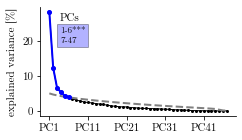

In [10]:
pl.plot_PC(cog_data_z, var, var_p_mean, index_significant)
plt.savefig('fig/PCs_cog.svg', dpi=500, bbox_inches='tight')

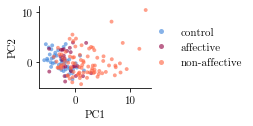

In [11]:
pl.plot_data_2D(cog_data_z_pca)
plt.savefig('fig/cog_data2D.svg', dpi=500, bbox_inches='tight')

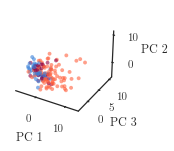

In [56]:
pl.plot_data_3D(cog_data_z_pca)
plt.savefig('fig/cog_data3D.svg', dpi=500, bbox_inches='tight')

In [13]:
cog_components = ana.get_feature_importance(cog_data_z, var, components)

In [14]:
ana.get_highest_contr_feat(cog_components, 'PC1')

Index(['cogcomp01_nih_fluidcogcomp_unadjusted', 'acpt01_auditory_t11',
       'cogcomp01_nih_crycogcomp_unadjusted', 'wasi201_iqscores_full2iq',
       'acpt01_auditory_t14', 'orrt01_read_acss', 'tpvt01_tpvt_acss',
       'lswmt01_tbx_ls', 'acpt01_auditory_t9', 'acpt01_auditory_t6'],
      dtype='object')

In [15]:
ana.get_highest_contr_feat(cog_components, 'PC2')

Index(['deldisk01_auc_40000', 'deldisk01_sv_5yr_40000',
       'deldisk01_sv_10yr_40000', 'deldisk01_auc_200',
       'deldisk01_sv_3yr_40000', 'deldisk01_sv_1yr_40000',
       'deldisk01_sv_6mo_40000', 'deldisk01_sv_1mo_40000',
       'acpt01_auditory_t5', 'acpt01_auditory_t8'],
      dtype='object')

In [16]:
ana.get_highest_contr_feat(cog_components, 'PC3')

Index(['er4001_er40_c_cr', 'er4001_er40_c_noe', 'er4001_er40_c_fph',
       'er4001_er40_c_fpf', 'er4001_er40_c_fpa', 'er4001_er40_c_sad',
       'er4001_er40_c_rtcr', 'orrt01_read_acss',
       'cogcomp01_nih_crycogcomp_unadjusted', 'wasi201_vocab_totalrawscore'],
      dtype='object')

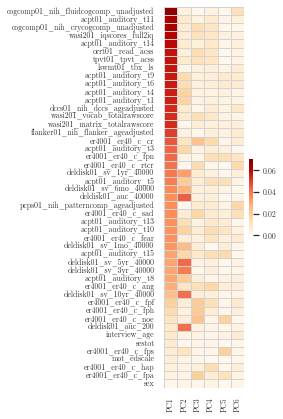

In [59]:
fig = plt.figure(figsize=(1.8,7))
#sns.set(font_scale=0.7)
im = sns.heatmap(cog_components[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']], 
                 cmap='OrRd', cbar_kws={"shrink": 0.2}, annot_kws={"fontsize":2},
                 linewidths=1,linecolor="lightgray", #annot=True,  fmt=".0",
                 vmin=0, vmax=0.07)
plt.savefig('fig/PCs_cog_loadings.svg', dpi=500, bbox_inches='tight')

In [57]:
sns.set(font_scale=0.7)
#sns.set_style(style='white') 

### brain features

In [24]:
pca = PCA()
pca.fit(brain_data_z)
components_brain = pca.components_
brain_data_z_pca = pca.transform(brain_data_z) # project the original data into the PCA space

In [25]:
var_brain = pca.explained_variance_ratio_
cumsum_brain = np.cumsum(var_brain)
np.argmax(cumsum_brain >= 0.95)

20

In [26]:
var_p_brain = ana.permutation_test(brain_data_z, 5000)
var_p_mean_brain = np.mean(var_p_brain, axis=0)
t,p = sci.stats.ttest_1samp(var_p_brain, var_brain, alternative='less')
index_significant_brain = np.where(p[:-1] != p[1:])[0][0]
print(sum(var_brain[:index_significant_brain+1]))
p

0.5301745046900608


array([0.        , 0.        , 0.        , 0.        , 0.97315714,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [53]:
print(var_brain[:10])
print(var_p_mean_brain[:10])

[0.25963305 0.10506733 0.09195499 0.07351914 0.05068802 0.04544159
 0.04457548 0.03600985 0.03451074 0.02681867]
[0.06424878 0.05964122 0.05622396 0.05333719 0.05073721 0.04835901
 0.04616681 0.04410904 0.04218532 0.04034815]


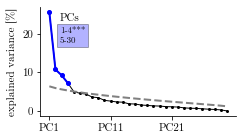

In [104]:
pl.plot_PC(brain_data_z, var_brain, var_p_mean_brain, index_significant_brain)
#plt.savefig('fig/PC_cog.svg', dpi=500, bbox_inches='tight')

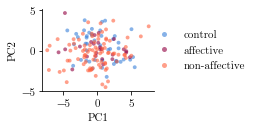

In [54]:
pl.plot_data_2D(brain_data_z_pca)

In [55]:
brain_components = ana.get_feature_importance(brain_data_z, var_brain, components_brain)

In [56]:
ana.get_highest_contr_feat(brain_components, 'PC1')

Index(['3', '4', '5', '29', '16', '26', '8', '1', '17', '30'], dtype='object')

In [57]:
ana.get_highest_contr_feat(brain_components, 'PC2')

Index(['12', '10', '7', '1', '14', '13', '5', '26', '18', '25'], dtype='object')

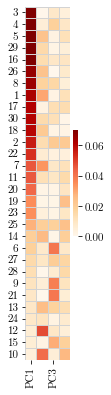

In [58]:
fig = plt.figure(figsize=(1.,6.5))

im = sns.heatmap(brain_components[['PC1', 'PC2', 'PC3', 'PC4']], 
                 cmap='OrRd', cbar_kws={"shrink": 0.3}, linewidths=1,linecolor="lightgray", #annot=True,  fmt=".0",
                 vmin=0, vmax=0.07)
im.set_yticklabels(im.get_yticklabels(), rotation=0)
im.set_xticklabels(im.get_xticklabels(), rotation=90)
plt.show()

### combined features 

In [59]:
data_z_all = cog_data_z.join(brain_data_z)

In [60]:
pca = PCA()
pca.fit_transform(data_z_all)
components_all = pca.components_
data_z_pca = pca.transform(data_z_all) # project the original data into the PCA space

In [61]:
var_all = pca.explained_variance_ratio_
cumsum = np.cumsum(var_all)
np.argmax(cumsum >= 0.95)

42

In [62]:
var_p_all = ana.permutation_test(data_z_all, 5000)
var_p_mean_all = np.mean(var_p_all, axis=0)
t,p = sci.stats.ttest_1samp(var_p_all, var_all, alternative='less')
index_significant_all = np.where(p[:-1] != p[1:])[0][0]
print(sum(var_all[:index_significant_all+1]))
p

0.5753982114357719


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [63]:
print(var_all[:10])
print(var_p_mean_all[:10])

[0.19880619 0.09592147 0.0678582  0.04195749 0.04005064 0.03800533
 0.03371629 0.03196654 0.02711608 0.02565579]
[0.03656786 0.03450841 0.03297913 0.03169434 0.03054197 0.02950695
 0.02853316 0.02762876 0.02676459 0.02594635]


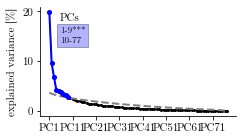

In [64]:
pl.plot_PC(data_z_all, var_all, var_p_mean_all, index_significant_all)
#plt.savefig('fig/PC_cog.svg', dpi=500, bbox_inches='tight')

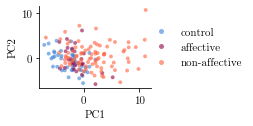

In [65]:
pl.plot_data_2D(data_z_pca)

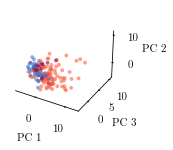

In [66]:
pl.plot_data_3D(cog_data_z_pca)

In [67]:
all_components = ana.get_feature_importance(data_z_all, var_all, components_all)

In [68]:
ana.get_highest_contr_feat(all_components, 'PC1')

Index(['cogcomp01_nih_crycogcomp_unadjusted',
       'cogcomp01_nih_fluidcogcomp_unadjusted', 'acpt01_auditory_t11',
       'wasi201_iqscores_full2iq', 'tpvt01_tpvt_acss', 'acpt01_auditory_t14',
       'orrt01_read_acss', 'lswmt01_tbx_ls', 'wasi201_matrix_totalrawscore',
       'acpt01_auditory_t9'],
      dtype='object')

In [69]:
ana.get_highest_contr_feat(all_components, 'PC2')

Index(['5', '4', '1', '3', '7', '8', 'deldisk01_auc_200', '22',
       'acpt01_auditory_t5', '29'],
      dtype='object')

In [70]:
ana.get_highest_contr_feat(all_components, 'PC3')

Index(['deldisk01_auc_40000', 'deldisk01_sv_10yr_40000',
       'deldisk01_sv_5yr_40000', 'deldisk01_auc_200', 'deldisk01_sv_3yr_40000',
       'deldisk01_sv_6mo_40000', 'deldisk01_sv_1yr_40000',
       'deldisk01_sv_1mo_40000', '3', '8'],
      dtype='object')

In [71]:
ana.get_highest_contr_feat(all_components, 'PC4')

Index(['12', '10', '2', '13', '21', '9', 'interview_age', '4', '26', '1'], dtype='object')

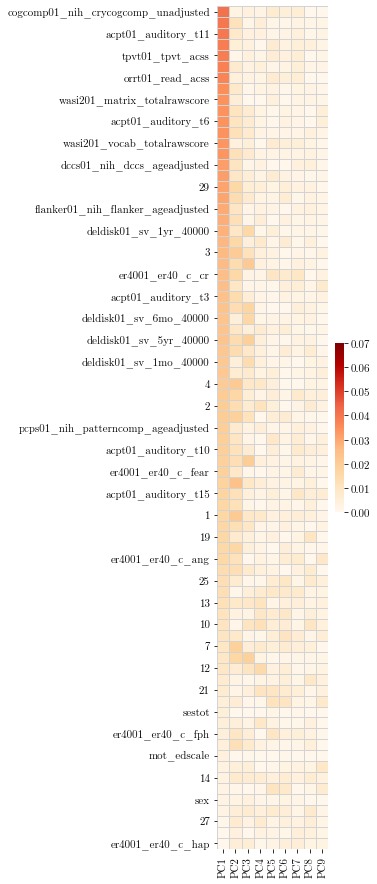

In [72]:
fig = plt.figure(figsize=(2.5,15.5))

im = sns.heatmap(all_components[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9']], 
                 cmap='OrRd', cbar_kws={"shrink": 0.2}, linewidths=1,linecolor="lightgray", #annot=True,  fmt=".0",
                 vmin=0, vmax=0.07)